# Kidney Disease Detection using Convolutional Neural Network


## Importing Required Packages and Libraries.

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
#import tensorflow.keras.preprocessing
import keras

## Splitting the Dataset into Training , Validation and Testing Directories.
The aquired dataset was not divided into Training , Validation and Testing Directories. We used 'splitfolders' library and using the function 'splitfolders.ratio()' to divide the dataset as required.

In [ ]:
import splitfolders
input_folder = 'Cataract Eye Detection Dataset/'
splitfolders.ratio(input_folder,output="Split Data Folder",
                   seed = 42, ratio = (0.7, 0.2, 0.1), group_prefix = None)

## Creating objects for ImageDataGenerator class and labeling them.

In [25]:
train = image.ImageDataGenerator(rescale = 1./255)
validation = image.ImageDataGenerator(rescale = 1./255)

Using 'flow_from_directory()' method to access the data folders and give labels to the data.

In [26]:
train_dataset = train.flow_from_directory(
    'Kidney Split Dataset/train/',
    batch_size = 20,
    target_size = (512,512),
    class_mode = 'categorical'
)

Found 6114 images belonging to 3 classes.


In [27]:
validation_dataset = validation.flow_from_directory(
    'Kidney Split Dataset/val/',
    batch_size = 20,
    target_size = (512,512),
    class_mode = 'categorical'
)

Found 1746 images belonging to 3 classes.


## Checking if the classes are correctly classified again

In [33]:
validation_dataset.class_indices


{'Normal': 0, 'Stone': 1, 'Tumor': 2}

## Adding Callbacks to the Model.
### A Callback is used to stop the training of a model when its accuracy meets a certain level of acceptance defined by the user.

In [6]:
class MyCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if logs.get('accuracy')>=0.99:
            print("\nTerminating the training as accuracy reached 95%")
            self.model.stop_training=True

## Defining the Convolutional Neural Network Architecture.

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),input_shape = (512,512,3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Flatten(input_shape = (512,512)),
    tf.keras.layers.Dense(256,activation = 'relu'),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dense(3,activation = 'softmax')
])

## Compiling the Model and Defining the loss function, optimizers, and metrics for prediction.

In [10]:
model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy', 
              metrics =['accuracy'])

## Instantiating the CallBack Object.

In [7]:
callback = MyCallbacks()

## Fitting the Data to the Model and Training it.

In [23]:
history = model.fit(train_dataset,
         validation_data = validation_dataset,
         epochs = 25,
          steps_per_epoch = 10,
         callbacks=[callback])

Epoch 1/25
10/10 [==============================] - ETA: 0s - loss: 0.0267 - accuracy: 0.9950
Terminating the training as accuracy reached 95%
10/10 [==============================] - 100s 11s/step - loss: 0.0267 - accuracy: 0.9950 - val_loss: 0.0289 - val_accuracy: 0.9863


## Saving the model

### The saving of a model helps in simply using this file where ever we need to classify the CT scans into the specific classes. The model can be saved in three formats i.e YAML File or JSON File or HD5 File, The First two formats only save the model's architecture but the HD5 File stores the neural networks weights. Hence we save our model with the format which gives us more flexibility i.e HD5 File.

In [ ]:
model.save('MyModel.h5')

In [4]:
model = keras.models.load_model("MyModel.h5")

## To understand the flow of the Neural Network, we can invoke the model.summary() method

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 510, 510, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 255, 255, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 253, 253, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 126, 126, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 62, 62, 64)       0

In [16]:
test_dataset = tf.keras.utils.image_dataset_from_directory(
          'Kidney Split Dataset/test/',
           shuffle=False,
           batch_size=1,
           image_size=(512,512))

Found 877 files belonging to 3 classes.


## Checking without an Interface whether the model functions well with Unknown data or not

1.jpg


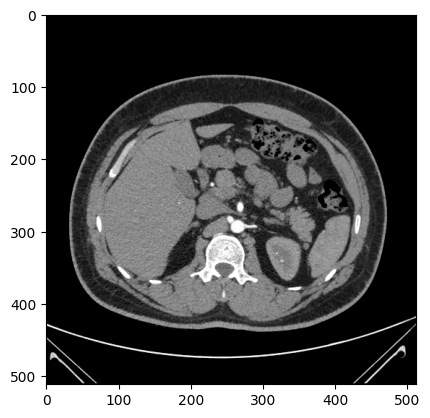

10.jpg


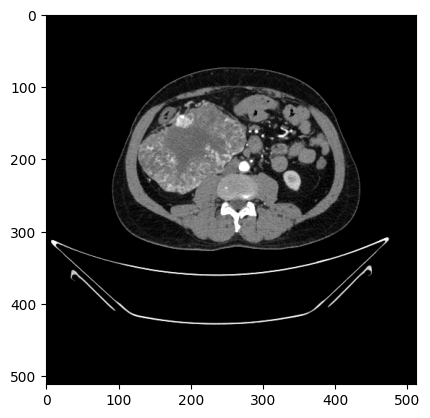

11.jpg


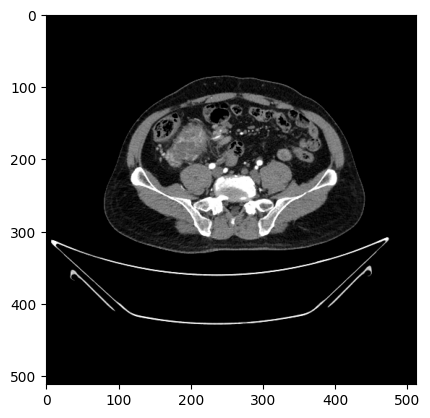

12.jpg


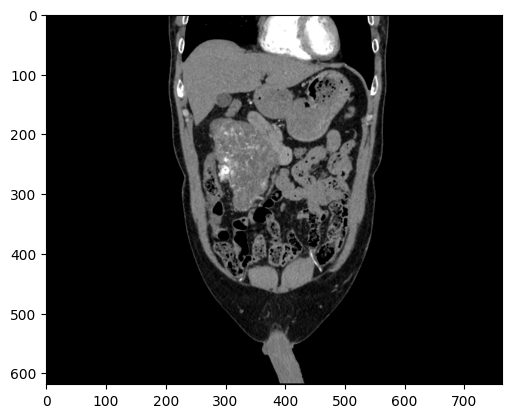

2.jpg


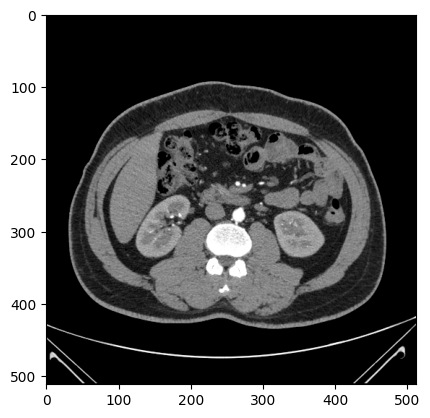

3.jpg


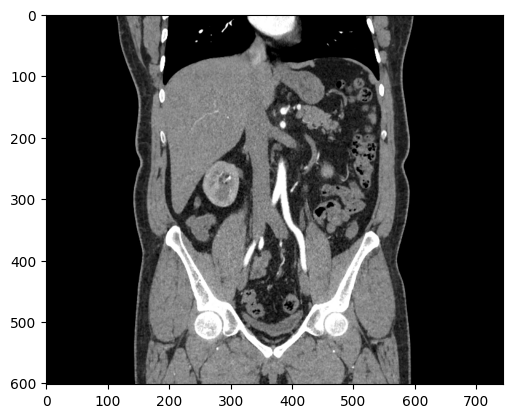

4.jpg


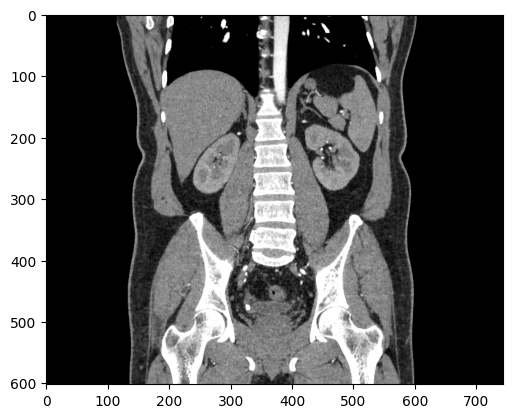

5.jpg


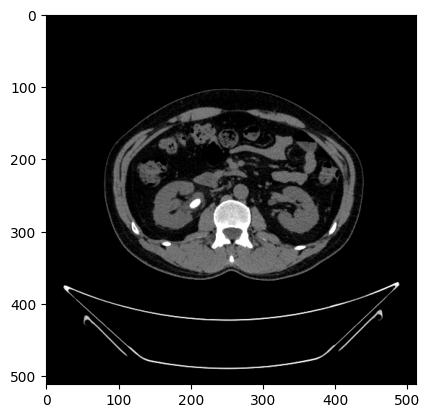

6.jpg


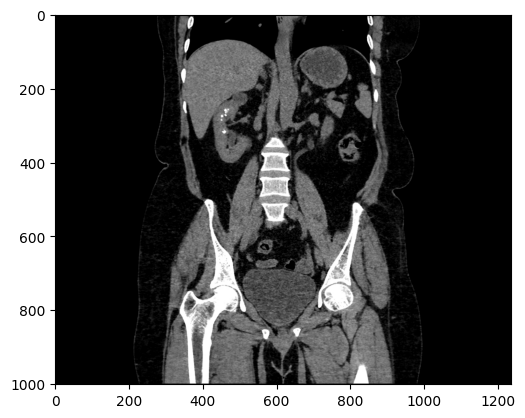

7.jpg


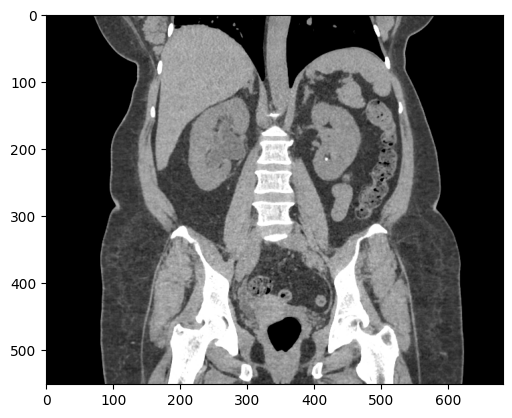

8.jpg


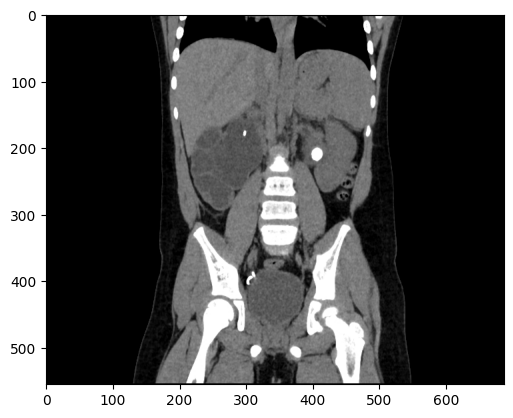

9.jpg


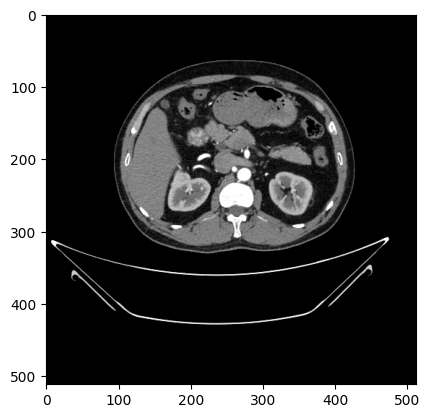

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
Test_DIR = 'Testing Data/'
for i in os.listdir(Test_DIR):
    print(i)
    img1 = image.load_img(Test_DIR+i)
    plt.imshow(img1)
    plt.show()

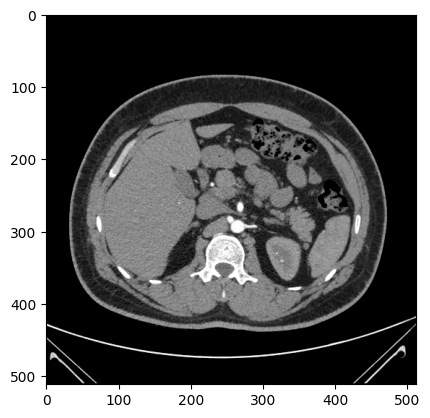

1/1 [==============================] - 0s 133ms/step
1.jpg
Normal


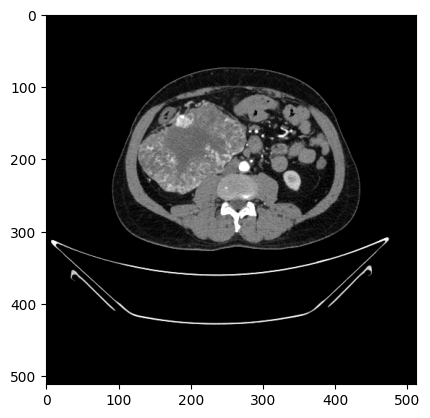

1/1 [==============================] - 0s 132ms/step
10.jpg
Tumor


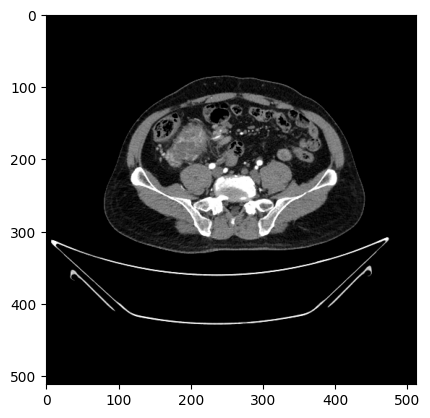

1/1 [==============================] - 0s 130ms/step
11.jpg
Tumor


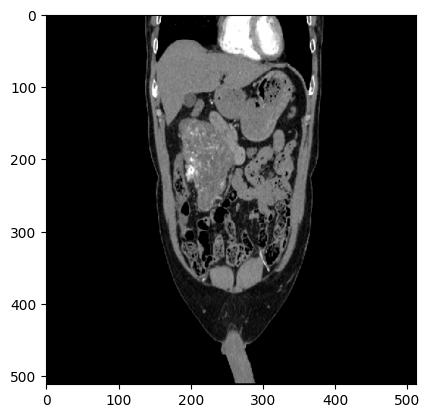

1/1 [==============================] - 0s 133ms/step
12.jpg
Tumor


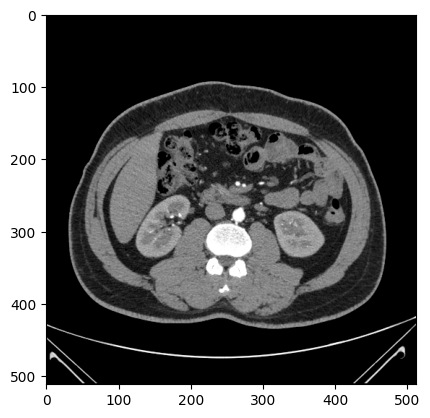

1/1 [==============================] - 0s 137ms/step
2.jpg
Normal


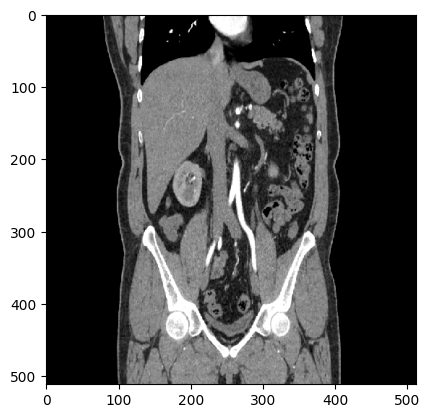

1/1 [==============================] - 0s 106ms/step
3.jpg
Normal


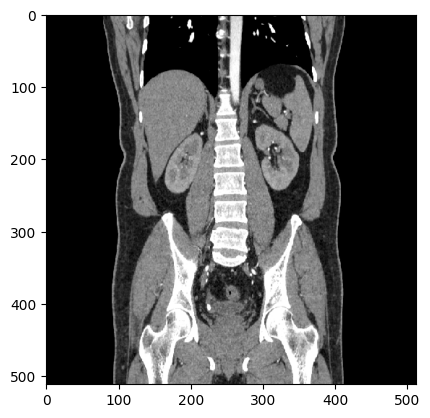

1/1 [==============================] - 0s 114ms/step
4.jpg
Normal


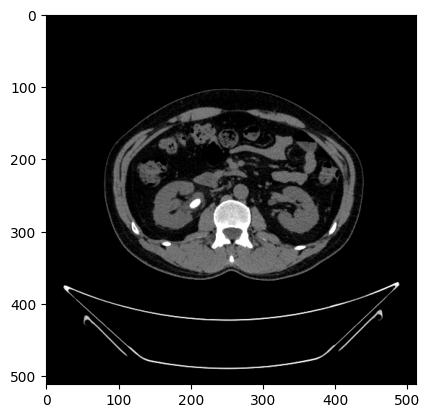

1/1 [==============================] - 0s 127ms/step
5.jpg
Stone


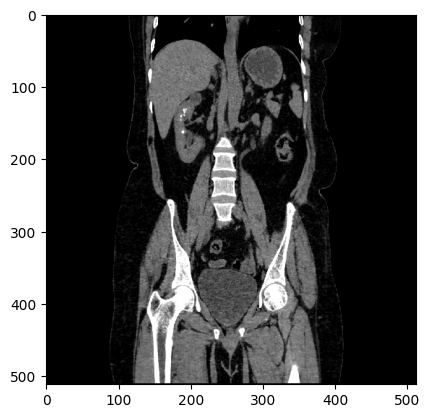

1/1 [==============================] - 0s 142ms/step
6.jpg
Stone


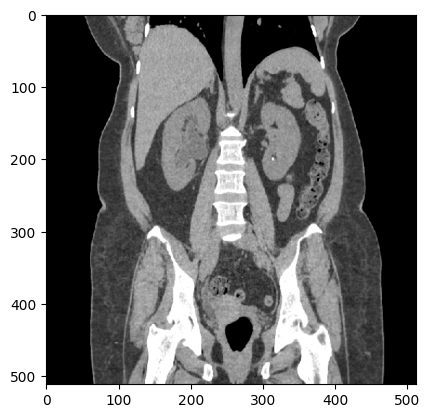

1/1 [==============================] - 0s 121ms/step
7.jpg
Stone


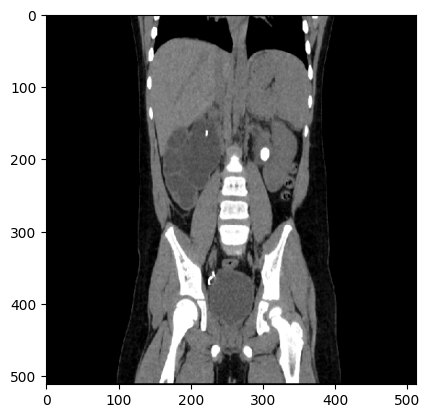

1/1 [==============================] - 0s 113ms/step
8.jpg
Stone


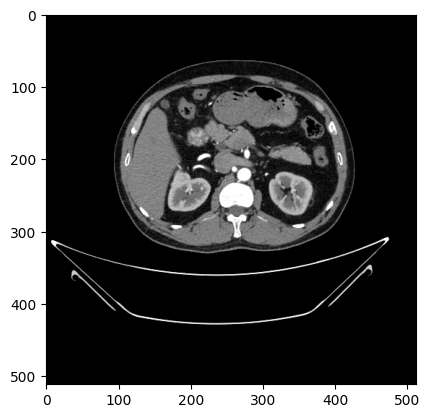

1/1 [==============================] - 0s 104ms/step
9.jpg
Tumor


In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
Test_DIR = 'Testing Data/'
for i in os.listdir(Test_DIR):
    img1 = image.load_img(os.path.join(Test_DIR, i), target_size=(512,512))
    plt.imshow(img1)
    plt.show()
    X = image.img_to_array(img1)
    X = np.expand_dims(X,axis = 0)
    images = np.vstack([X])
    val = model.predict(images)
    predicted_class = np.argmax(val)
    print(i)
    if predicted_class == 0:
        print("Normal")
    elif predicted_class == 1:
        print("Stone")
    else:
        print("Tumor")

## Creating a User Interface for the Model

In [5]:
import tkinter as tk
from tkinter import filedialog
from PIL import ImageTk, Image
import tensorflow as tf
import numpy as np

# Load the trained model
model = tf.keras.models.load_model('MyModel.h5')

# Create a function to preprocess the image
def preprocess_image(img):
    img = img.resize((512, 512))
    img = np.array(img)
    img = img / 255.0  # Normalize the image
    img = np.expand_dims(img, axis=0)
    return img

# Create a function to make predictions
def predict_category(img):
    processed_img = preprocess_image(img)
    prediction = model.predict(processed_img)[0]
    labels = ['Normal', 'Stone', 'Tumor']
    category = labels[np.argmax(prediction)]
    return category

# Create the Tkinter GUI window
window = tk.Tk()
window.title("CT Scan Classifier")

# Create a function to handle image selection
def select_image():
    file_path = filedialog.askopenfilename(filetypes=[("Image Files", "*.jpg;*.jpeg;*.png")])
    if file_path:
        image = Image.open(file_path)
        image = image.resize((300, 300))
        image_tk = ImageTk.PhotoImage(image)
        image_label.configure(image=image_tk)
        image_label.image = image_tk  # Keep a reference to prevent garbage collection
        category = predict_category(image)
        result_label.configure(text="Predicted Category: " + category)

# Create the image label
image_label = tk.Label(window)
image_label.pack()

# Create the select image button
select_button = tk.Button(window, text="Select Image", command=select_image)
select_button.pack(pady=10)

# Create the result label
result_label = tk.Label(window, text="Predicted Category:")
result_label.pack()

# Start the Tkinter event loop
window.mainloop()


1/1 [==============================] - 0s 298ms/step
